In [1]:
print "Hello world!\n"

Hello world!



Python is a high level programming language that is useful for astronomical data reduction.

First thing's first -- when you use Python you must import all necessary packages. Since we're using python 2.7, a useful thing to do is import division from future versions of Python. Let's see what happens when we don't. What do you expect the following output to be? 

In [2]:
2/3

0

This is called integer division, and can be easily fixed by making one value a float or importing the following package:

In [3]:
from __future__ import division
2/3

0.6666666666666666

Success! Now, let's import some other packages and learn the basics of plotting and curve fitting:

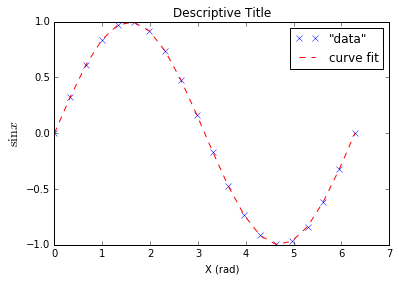

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import math
import astropy
from scipy.optimize import curve_fit

# making "data", see numpy or math package dcumentation
x = np.linspace(0,2*math.pi, 20)
y = [math.sin(i) for i in x]


#plotting "data", see matplotlib documentation
plt.figure(1)
plt.plot(x,y,marker = "x", linestyle = "", label = "\"data\"")
plt.xlabel("X (rad)")
plt.ylabel(r"$\sin{x}$", fontsize = 14)


# this is how you define a function, with a name, parameters, and something to return
def unknown_sine_function(x,a,b,c):
    return a*np.sin(b*x) + c

# say you don't know the parameters of your sine function, and you want to fit your curve:
popt, pcov = curve_fit(unknown_sine_function, x, y)

# compare our fitted function to our "data"
plt.plot(x, unknown_sine_function(x,*popt), linestyle = "--", color = "r", label = "curve fit")
plt.title("Descriptive Title")
plt.legend(loc = "best")
plt.show()

Alright, we can import, plot, and fit a curve to data. Now let's learn a method for simple linear regression: 

[-2.         -1.72222222 -1.44444444 -1.16666667 -0.88888889 -0.61111111
 -0.33333333 -0.05555556  0.22222222  0.5       ]


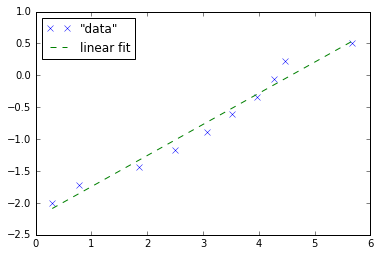

In [5]:
x = np.linspace(0,5, 10)
noise = np.random.random(len(x))

# linear
def linear_fun(x, b, m):
    return b + m * x 

y = linear_fun(x, -2, 0.5)
# neeeearly linear
x += noise
print y
plt.figure(2)
plt.plot(x,y, marker = "x", linestyle = "", label = "\"data\"")

# deg = 1 is what makes it linear, can use for higher order polinomial fits as well!
linear_fit = np.polynomial.polynomial.polyfit(x,y, deg = 1)

linear_regression = linear_fun(x,*linear_fit)

plt.plot(x,linear_regression, linestyle = "--", label = "linear fit")
plt.legend(loc="best")
plt.show()
#plt.savefig("figure1.png")

Well, what if we want to use actual data? Let's look at one way to load in a file:

In [6]:
# loads the data in to a numpy array, skips the two header lines
data = np.loadtxt("Downloads/python_examples/test_data.txt", skiprows = 2)
data

array([[  1. ,   1. ,   2. ],
       [  1.5,   2. ,   4. ],
       [  2. ,   3. ,   6. ],
       [  2.5,   4. ,   8. ],
       [  3. ,   5. ,  10. ]])

Yay! We have data. This method works well for data aranged in to rows and columns, which can be manipulated like so:

In [7]:
time = data[:][0]
x1 = data[:][1]
x2 = data[:][2]

print "x1 = ", x1

last_time = time[-1]
print "last time = ", last_time

x1 =  [ 1.5  2.   4. ]
last time =  2.0


Before we move on, a few words on arrays and array operations. Python arrays are sort of like matrices, with indexing begining at zero, as you saw above. You can also do negative indexing. However, the indexing is not inclusive on the final value:

In [8]:
x1[0:2]

array([ 1.5,  2. ])

Instead of displaying the 0th, 1st, and 2nd index, only the first two are shown. Also, numpy is your friend and should be used for array manipulations.

In [9]:
# making a 3x3 array of float ones
y = np.ones((3,3), dtype = np.float64)

print "y = \n", y

# making a list an array
x = np.array([1,2,3])

# some operations
print "\nx = ", x
# this is NOT matrix multiplication
print "\nx*y = \n", x * y 
# this is
print "\nx \"dot\" y = ", np.dot(x,y)

# this is how you make an exponent
print "\nx squared = ", x ** 2
# actually a bit-wise exclusive or operator in binary. Neat! But definitely not x to the power of two
print "\nNOT x squared: ", x^2

# scientific notation, for completeness
print "\npython understands scientific notation:", 1e1

y = 
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]

x =  [1 2 3]

x*y = 
[[ 1.  2.  3.]
 [ 1.  2.  3.]
 [ 1.  2.  3.]]

x "dot" y =  [ 6.  6.  6.]

x squared =  [1 4 9]

NOT x squared:  [3 0 1]

python understands scientific notation: 10.0


There are lots of pre-made packages in numpy like this that make reading in and manipulating data easy and you should check python documentation for more functions. If all else fails, you can always manually open, read, and manipulate your data.

In [10]:
f = open("Downloads/python_examples/test_data.txt", 'r')

lines = f.readlines()

for line in lines:
    print line
    # maybe you store and manipulate data here

# you open it, you close it
f.close()

# This is a header line

# Time    x_1    x_2

1.0	  1	 2

1.5	  2	 4

2.0	  3	 6

2.5	  4	 8

3.0	  5	 10





Finally, fits files.

In [11]:
from astropy.io import fits

spectra = fits.open("Downloads/spec-4561-55614-0126.fits")
spectra.info()
# wooooo data!
print "\ndata:\n", spectra[5].data
# you open it, you close it
spectra.close()

Filename: Downloads/spec-4561-55614-0126.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     126   ()      
  1  COADD         1 BinTableHDU     26   4633R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPALL         1 BinTableHDU    474   1R x 232C   [27A, 14A, 4A, E, E, J, J, E, J, E, E, E, K, K, K, K, K, B, B, J, I, 5E, 5E, J, J, J, J, 6A, 6A, 16A, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, 5E, E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 16A, 9A, 12A, E, E, E, E, E, E, E, E, J, E, E, J, J, 6A, 21A, E, 35E, K, 19A, 19A, 19A, B, B, B, I, 3A, B, I, I, I, I, J, E, J, J, E, E, E, E, E, E, E, E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5J, 5J, 5J, 5E, 5J, 75E, 75E, 5E, 5E, 5E, 5J, 5E, D, D, D, D, D, D, D, D, D, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 